<a href="https://colab.research.google.com/github/GuDevi/SMS-Classifier---Task-1/blob/main/SMS_Classifier_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
import pandas as pd
import string
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/SMSSpamCollection.txt", sep="\t", names=["label","message"])
df.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
df["Length"] = df["message"].apply(len)
df.head(2)

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


<ipython-input-12-3d4ab4e1fb1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Length"], bins=50)


<Axes: xlabel='Length', ylabel='Density'>

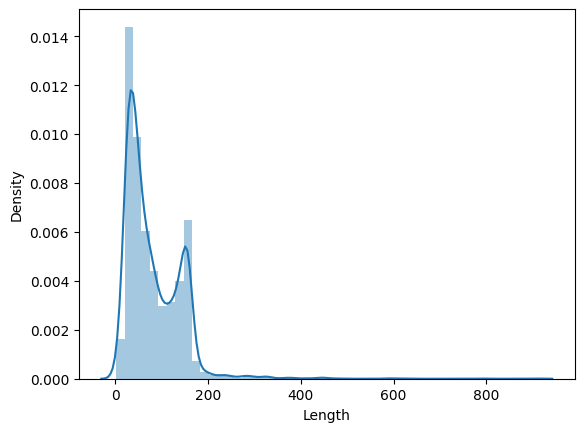

In [ ]:
sns.distplot(df["Length"], bins=50)

In [ ]:
df["Length"].max()

910

In [ ]:
df[df["Length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
df[df["Length"] == df["Length"].min()]["message"].iloc[0]

'Ok'

In [ ]:
df.head(12)

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


<Axes: xlabel='label', ylabel='Length'>

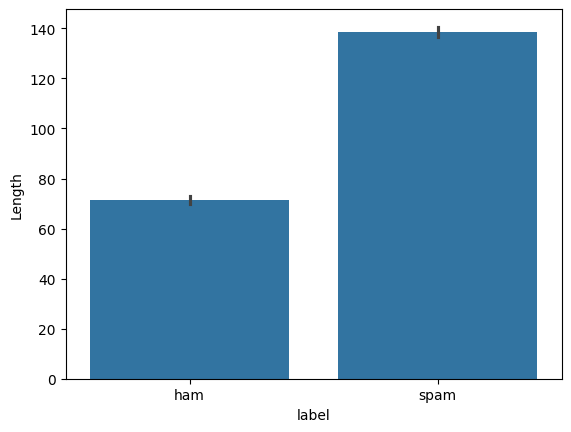

In [ ]:
sns.barplot(x='label', y='Length', data=df)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

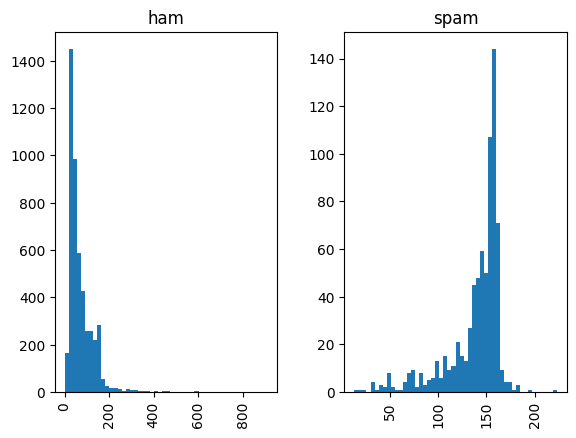

In [ ]:
df.hist(column='Length',by='label', bins=50)

In [ ]:
class PreProcessText(object):
    def _init_(self):
        pass

    def __remove_punctuation(self, text):
        """
        Takes a String
        return : Return a String
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)

        return message

    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words


    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to
        Train the Model
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
mess = 'Sample message! Notice: it has punctuation.'
obj = PreProcessText()
words = obj.token_words(mess)
print(words)

['Sample', 'message', 'Notice', 'punctuation']


In [ ]:
df["message"].head(4).apply(obj.token_words)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
Name: message, dtype: object

In [ ]:
bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(df["message"])
messages_bow = bow_transformer.transform(df["message"])
print("Shape of sparese matrix {}".format(messages_bow.shape))

Shape of sparese matrix (5572, 11425)


In [ ]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [ ]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)


In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(messages_tfidf,df["label"])

In [ ]:
all_predictions = model.predict(messages_tfidf)
pred = pd.DataFrame(data=all_predictions)
pred.head(9)

,0
0,ham
1,ham
2,spam
3,ham
4,ham
5,ham
6,ham
7,ham
8,spam


In [ ]:
df["label"].head(20)

0      ham
1      ham
2     spam
3      ham
4      ham
5     spam
6      ham
7      ham
8     spam
9     spam
10     ham
11    spam
12    spam
13     ham
14     ham
15    spam
16     ham
17     ham
18     ham
19    spam
Name: label, dtype: object